In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pickle  # For saving the model


In [3]:
# Replace with your actual CSV file path
data_path = "D:\VerveBridge\Task 2\predictive_maintenance.csv"
df = pd.read_csv(data_path)

# Check the first few rows of the dataset
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
# Check for null values
print("Null values in each column:")
print(df.isnull().sum())

# Basic statistics
print("Data Description:")
print(df.describe())


Null values in each column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
Data Description:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque

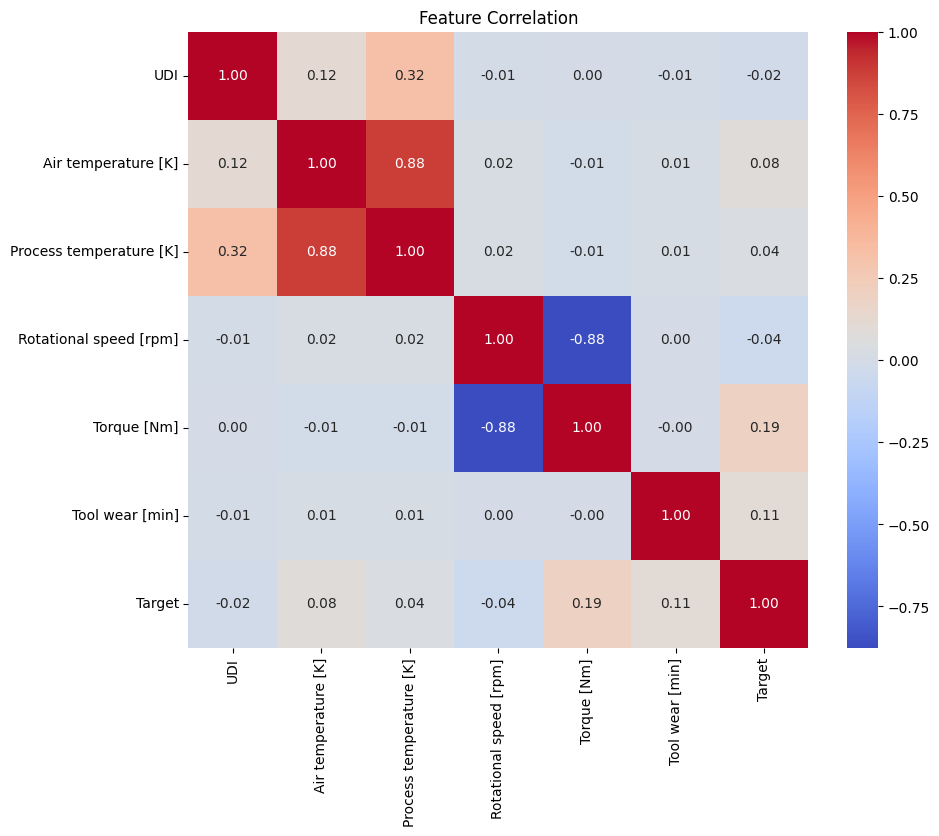

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()




In [9]:
print(df.columns)


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


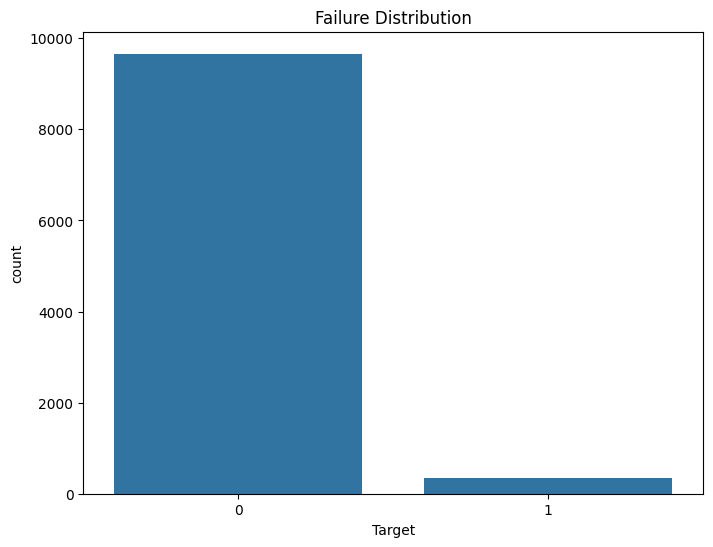

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Target' column exists
if 'Target' in df.columns:
    # Visualize the distribution of the target variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Target', data=df)
    plt.title('Failure Distribution')
    plt.show()
else:
    print("The 'Target' column is not in the DataFrame. Check the column names.")


In [12]:
# Example: Creating rolling averages as features
df['rolling_avg_temp'] = df['Air temperature [K]'].rolling(window=5).mean()  # Replace with the relevant column

# Handle any NaN values resulting from rolling averages
df = df.dropna()

# Check the updated dataframe
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
4                    1408         40.0                9       0   No Failure   
5                    1425         41.9               11       0   No Failure   
6                    1558         42.4               14       0   No Failure   
7                    1527         40.2               16       0   No Failure   
8                    1667         28.6               18       0   No Failure   

   rolling_avg_temp  
4            298.16  
5            298.16  
6            298.14 

In [14]:
# Ensure to replace 'Target' with the actual name of your target column
X = df.drop(['Target'], axis=1)  # Drop target column
y = df['Target']  # Target variable

# Filter numeric columns
X_numeric = X.select_dtypes(include='number')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training (using RandomForest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training (using RandomForest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:

print(X.dtypes)


UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Failure Type                object
rolling_avg_temp           float64
dtype: object


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop non-numeric columns that are not needed for the model
df = df.drop(['Product ID'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Type', 'Failure Type'], drop_first=True)

# Split features and target variable
X = df_encoded.drop(['Target'], axis=1)  # Replace 'Target' with the actual name of your target column
y = df_encoded['Target']  # Replace 'Target' with the actual name of your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training (using RandomForest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      0.97      0.99        70

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [18]:
# Save the trained model as a .pkl file
model_filename = 'predictive_maintenance_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")


Model saved to predictive_maintenance_model.pkl


Model Accuracy: 0.999
Model Precision: 1.0
Model Recall: 0.9714285714285714
Model F1-Score: 0.9855072463768115
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      0.97      0.99        70

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



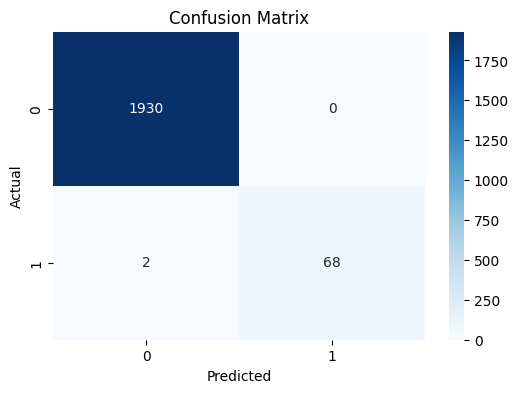

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Model Precision:", precision_score(y_test, y_pred))
print("Model Recall:", recall_score(y_test, y_pred))
print("Model F1-Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Simulate a real-time prediction scenario with a sample from test data
sample_data = X_test[0].reshape(1, -1)
predicted_failure = model.predict(sample_data)
print("Predicted Failure (1 = Yes, 0 = No):", predicted_failure)


Predicted Failure (1 = Yes, 0 = No): [0]


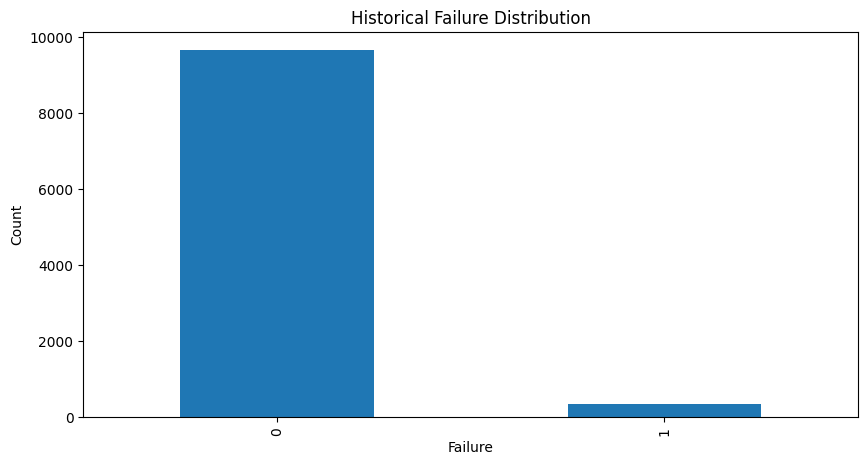

In [22]:
# Historical Failure Rate
plt.figure(figsize=(10, 5))
df['Target'].value_counts().plot(kind='bar')  # Use the correct column name
plt.title('Historical Failure Distribution')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()


In [3]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load your training data
df = pd.read_csv('predictive_maintenance.csv')

# Select features for scaling
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]']
X = df[features]

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your dataset
df = pd.read_csv('predictive_maintenance.csv')

# Select the 5 features you want to use
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'  # Assuming this is the target variable

# Separate features and target
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model and scaler
with open('predictive_maintenance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler have been saved.")


Model and scaler have been saved.


In [9]:
import pandas as pd
import pickle

# Load the trained model and scaler
with open('predictive_maintenance_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

def predict(data):
    # Create a DataFrame with the input data
    df = pd.DataFrame([data])
    
    # Scale features
    X_scaled = scaler.transform(df[features])
    
    # Predict
    prediction = model.predict(X_scaled)
    return prediction

# Example usage
sample_data = {
    'Air temperature [K]': 300.0,
    'Process temperature [K]': 400.0,
    'Rotational speed [rpm]': 1500,
    'Torque [Nm]': 20.0,
    'Tool wear [min]': 150
}

print(predict(sample_data))


['No Failure']


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define the updated sample data
data = {
    'Air temperature [K]': [298.7, 298.8, 298.8, 298.9, 298.9, 298.9, 298.8, 298.7, 298.7, 298.8, 298.8],
    'Process temperature [K]': [309, 309.1, 309.2, 309.2, 309.1, 309.1, 309, 309, 309, 308.9, 308.9],
    'Rotational speed [rpm]': [1843, 1418, 1425, 1412, 2861, 1383, 1497, 1565, 1691, 1461, 1455],
    'Torque [Nm]': [25.8, 46.3, 53.9, 44.1, 4.6, 54.9, 43.8, 35.1, 30.1, 47.9, 41.3],
    'Tool wear [min]': [130, 133, 135, 140, 143, 145, 147, 152, 154, 206, 208],
    'Failure Type': ['No Failure', 'No Failure', 'No Failure', 'No Failure', 'Power Failure', 'No Failure', 'No Failure', 'No Failure', 'No Failure', 'No Failure', 'Tool Wear Failure']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Failure Type'

X = df[features]
y = df[target]

# Encode target variable as binary (0 for No Failure, 1 for Power Failure, 2 for Tool Wear Failure)
y_encoded = y.map({'No Failure': 0, 'Power Failure': 1, 'Tool Wear Failure': 2})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model and scaler
with open('predictive_maintenance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler have been saved.")


Model and scaler have been saved.


In [11]:
import pandas as pd
import pickle

# Load the trained model and scaler
with open('predictive_maintenance_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

def predict(data):
    # Create a DataFrame with the input data
    df = pd.DataFrame([data])
    
    # Scale features
    X_scaled = scaler.transform(df[features])
    
    # Predict
    prediction = model.predict(X_scaled)
    
    # Convert prediction back to original label
    return {0: 'No Failure', 1: 'Power Failure', 2: 'Tool Wear Failure'}[prediction[0]]

# Example usage
sample_data = {
    'Air temperature [K]': 298.8,
    'Process temperature [K]': 308.9,
    'Rotational speed [rpm]': 1461,
    'Torque [Nm]': 47.9,
    'Tool wear [min]': 206
}

print(predict(sample_data))


Tool Wear Failure
